In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

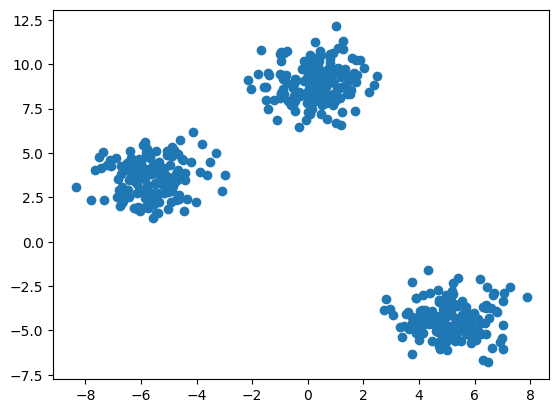

In [24]:
x, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)
fig = plt.figure(0)
#plt.grid(True)
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [25]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2 * (2 * np.random.random((x.shape[1],))-1)
    pointer = []
    cluster = {
        'center': center,
        'points': []
    }
    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

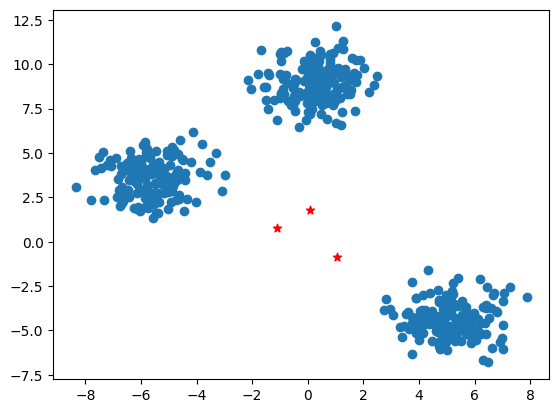

In [26]:
plt.scatter(x[:, 0], x[:, 1])
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='red')
plt.show()

In [27]:
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [28]:
def assign_clusters(x, clusters):
    for idx in range(x.shape[0]):
        dist = []

        curr_x = x[idx]

        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)
        
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(x, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
    return clusters

In [29]:
def pred_cluster(x, clusters):
    pred = []
    for i in range(x.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(x[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [30]:
clusters = assign_clusters(x, clusters)
clusters = update_clusters(x, clusters)
pred = pred_cluster(x, clusters)

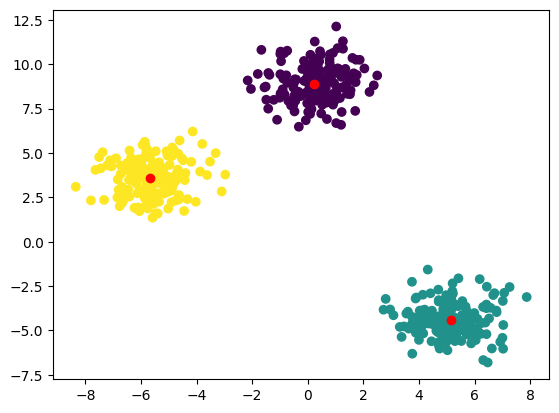

In [37]:
plt.scatter(x[:, 0], x[:, 1], c=pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='o', c='red')
plt.show()

# Example 2

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [44]:
x, y = load_iris(return_X_y=True)

In [46]:
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(x)
    sse.append(km.inertia_)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

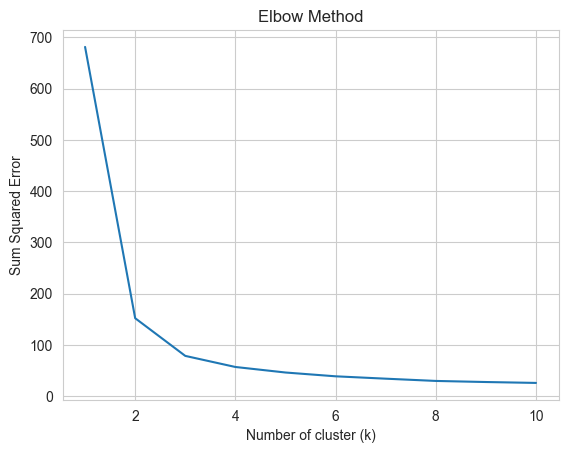

In [47]:
sns.set_style("whitegrid")
g = sns.lineplot(x=range(1, 11), y=sse)

g.set(xlabel="Number of cluster (k)", ylabel="Sum Squared Error", title="Elbow Method")

plt.show()

In [48]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(x)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=2)

In [49]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [50]:
pred = kmeans.fit_predict(x)
pred

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

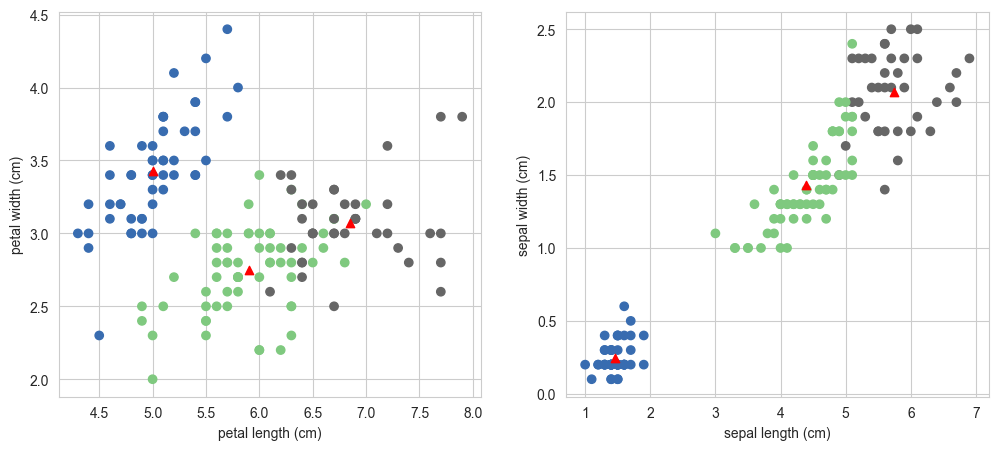

In [52]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
     
plt.subplot(1,2,2)   
plt.scatter(x[:,2],x[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()